## 1. Loading the required libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris
import pickle as pkl

## 2. Loading data

In [2]:
dataset = load_iris()
X = dataset.data
y = dataset.target

## 3. Creating dataframe from datasets

In [3]:
df = pd.DataFrame(X, columns=dataset.feature_names)
df['species'] = pd.DataFrame(y)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## 4. Exploring data

In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

## 5. Dealing with missing values:

In [8]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

As there is no missing value, we need not to make any change in our dataset.

## 6. Visualizing Data

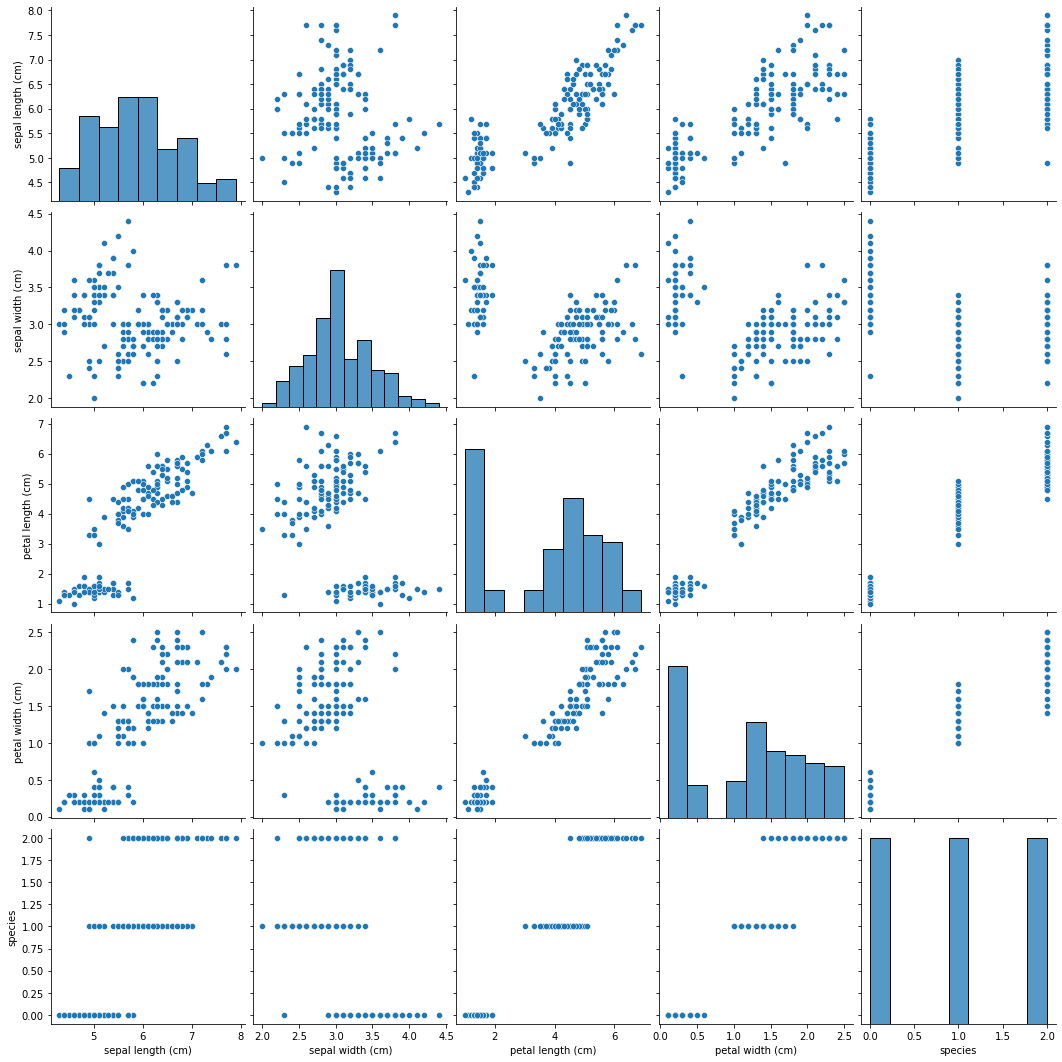

In [9]:
sns.pairplot(df, height=3)
plt.show()

<AxesSubplot:>

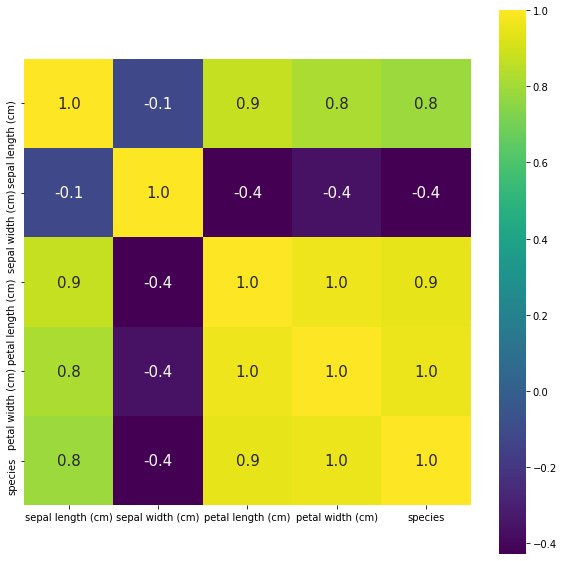

In [10]:
corr = df.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15},cmap='viridis', linecolor="white")

## 7. Splitting the dataset:
Our test dataset will be 20% of the original dataset and training data will be of 80% of the original dataset.

In [11]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
def print_confusion_matrix(actual_y, predicted_y, string):
    cm = confusion_matrix(actual_y, predicted_y)
    plt.figure(figsize=(6,6))
    plt.title('Confusion matrix on '+ string + ' data')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

In [14]:
accuracy_train = []
accuracy_test = []

## 8. Training model using Logistic regression

The accuracy of Logistic Regression model on testing data: 0.9416666666666667


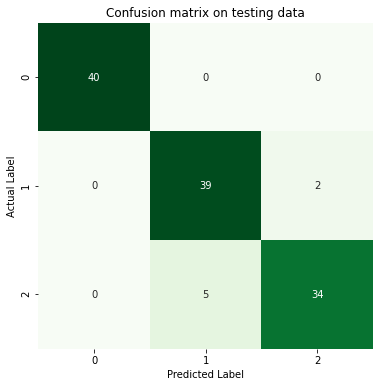

In [15]:
model = LogisticRegression()
clf = model.fit(X_train, y_train)

# Performance of the model on testing data

y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
accuracy_test.append(score*100)
print("The accuracy of Logistic Regression model on testing data: " + str(score))
print_confusion_matrix(y_test, y_pred, "testing")

The accuracy of Logistic Regression model on training data: 1.0


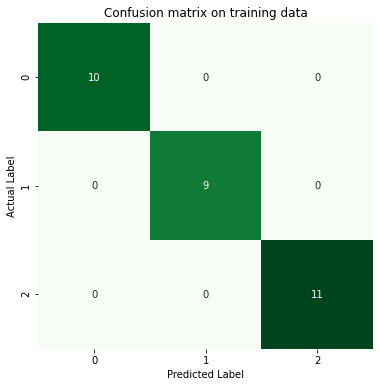

In [16]:
# Performance of the model on training data

predicted_y_train = clf.predict(X_train)
score = accuracy_score(y_train, predicted_y_train)
accuracy_train.append(score*100)
print("The accuracy of Logistic Regression model on training data: " + str(score))
print_confusion_matrix(y_train, predicted_y_train, "training")

## 9. Training model using Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### Finding best model using Grid Search CV

In [18]:
param_grid = {'max_depth' : [1, 2, 3]}
model = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = model.fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(max_depth=2)

The accuracy of Logistic Regression model on testing data: 0.95


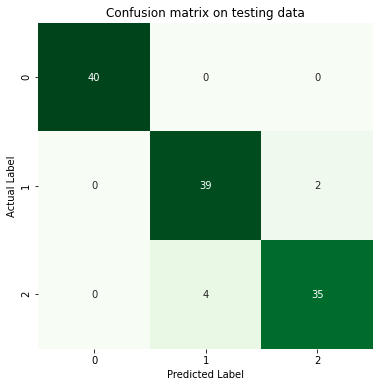

In [19]:
model = DecisionTreeClassifier(max_depth=3)
clf = model.fit(X_train, y_train)

# Performance of the model on testing data

y_pred_dt = clf.predict(X_test)
score = accuracy_score(y_test, y_pred_dt)
accuracy_test.append(score*100)
print("The accuracy of Logistic Regression model on testing data: " + str(score))
print_confusion_matrix(y_test, y_pred_dt, "testing")

The accuracy of Logistic Regression model on training data: 1.0


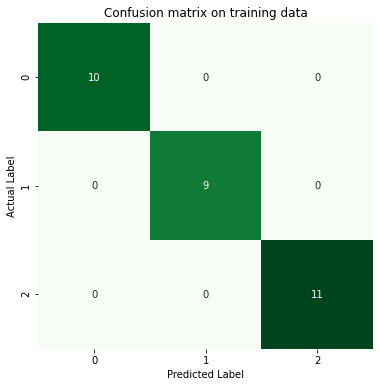

In [20]:
# Performance of the model on training data

y_pred_dt_train = clf.predict(X_train)
score = accuracy_score(y_train, y_pred_dt_train)
accuracy_train.append(score*100)
print("The accuracy of Logistic Regression model on training data: " + str(score))
print_confusion_matrix(y_train, y_pred_dt_train, "training")

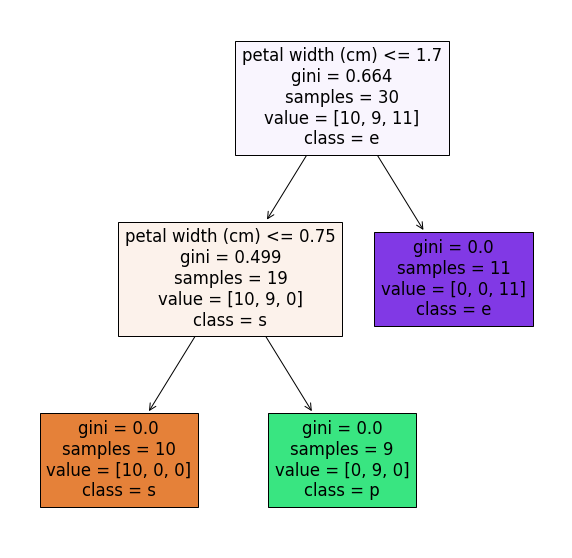

In [21]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf,feature_names=dataset.feature_names,class_names='species',filled=True)

## 10. Training model using svm

In [22]:
from sklearn.svm import SVC

### Finding best model using GridSearchCV

In [23]:
param_grid = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 3, 10, 30]}
model = GridSearchCV(SVC(), param_grid)
clf = model.fit(X_train, y_train)
clf.best_estimator_

SVC(C=1, kernel='linear')

The accuracy of Logistic Regression model on testing data: 0.9416666666666667


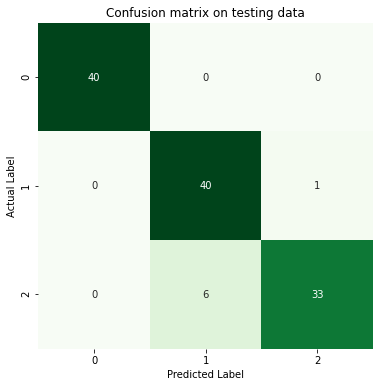

In [24]:
model = SVC(C=1, kernel='linear')
clf = model.fit(X_train, y_train)

# Performance of the model on testing data

y_pred_svm = clf.predict(X_test)
score = accuracy_score(y_test, y_pred_svm)
accuracy_test.append(score*100)
print("The accuracy of Logistic Regression model on testing data: " + str(score))
print_confusion_matrix(y_test, y_pred_svm, "testing")

The accuracy of Logistic Regression model on training data: 0.9666666666666667


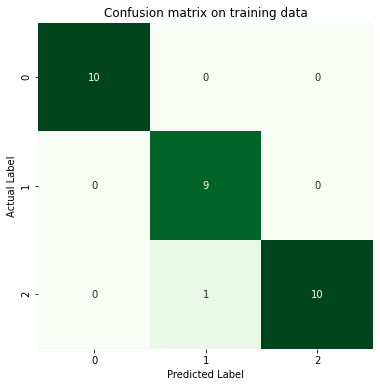

In [25]:
# Performance of the model on training data

y_pred_svm_train = clf.predict(X_train)
score = accuracy_score(y_train, y_pred_svm_train)
accuracy_train.append(score*100)
print("The accuracy of Logistic Regression model on training data: " + str(score))
print_confusion_matrix(y_train, y_pred_svm_train, "training")

## Comparing the models

In [26]:
test = pd.DataFrame()
names = ['Logistic regression', 'Decision Tree Classifier', 'Support Vector Machine']
test['Accuracy'] = accuracy_test
test['Classifier'] = names

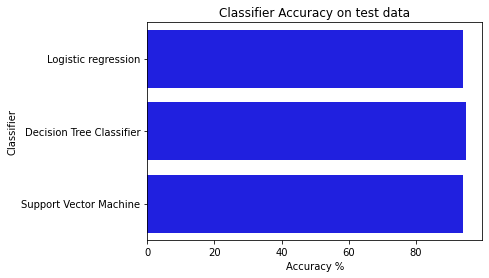

In [27]:
sns.barplot(x='Accuracy', y='Classifier', data=test, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy on test data')
plt.show()

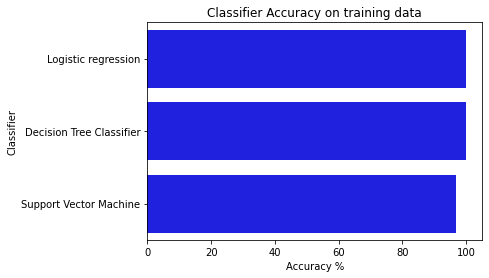

In [28]:
test = pd.DataFrame()
names = ['Logistic regression', 'Decision Tree Classifier', 'Support Vector Machine']
test['Accuracy'] = accuracy_train
test['Classifier'] = names
sns.barplot(x='Accuracy', y='Classifier', data=test, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy on training data')
plt.show()

## Conclusion

We can conclude that the models are performing simillarly for the test dataset and the accuracy for all is between 
94% - 95%. But for the training dataset the accuracy of support vector machine is slightly lesser than the other two models.